In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from scipy.fft import fft, ifft, fftfreq


In [2]:
def source(qTime):
    return np.exp(-(qTime - 30.) * (qTime - 30.) / 100.) /imp0

In [3]:
NUM_PORTS = 4
SIZE = 200
imp0 = 377
connect = 50
tau = 1
kappa = 4

maxTime = 400

In [4]:
ez = np.zeros([NUM_PORTS,SIZE])
hy = np.zeros([NUM_PORTS,SIZE])
ez1_tab = np.zeros([maxTime, SIZE])
ez2_tab = np.zeros([maxTime, SIZE])
for qTime in range(maxTime):
    s = source(qTime)
    
    hy[0,SIZE-1] = hy[0,SIZE-2] # simple ABC for hy[SIZE-1]

    for j in range(SIZE-1):
        hy[0,j] = hy[0,j] + (ez[0,j+1] - ez[0,j]) / imp0;

    hy[0,49] -= s /imp0  
        
    ez[0,0] = ez[0,1] # simple ABC on the left side
    
    for j in range(1,SIZE):
        ez[0,j] = ez[0,j] + (hy[0,j] - hy[0,j-1]) * imp0;

    ez[0,49] += s


    s_new = ez[0,-1] * tau
    
    hy[1,SIZE-1] = hy[1,SIZE-2] # simple ABC for hy[SIZE-1]


    for j in range(SIZE-1):
        hy[1,j] = hy[1,j] + (ez[1,j+1] - ez[1,j]) / imp0;

    hy[1,1] -= s_new /imp0   
        
    ez[1,0] = ez[1,1] # simple ABC on the left side
    
    for j in range(1,SIZE):
        ez[1,j] = ez[1,j] + (hy[1,j] - hy[1,j-1]) * imp0;

    ez[1,1] += s_new

    
    ez1_tab[qTime,:] = ez[0,:]   
    ez2_tab[qTime,:] = ez[1,:]   

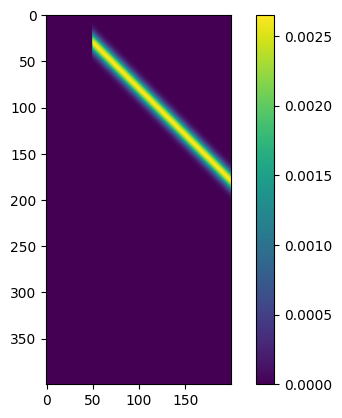

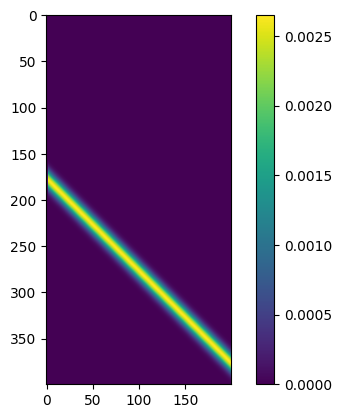

In [5]:
plt.imshow(ez1_tab)
plt.colorbar()
plt.show()
plt.imshow(ez2_tab)
plt.colorbar()
# plt.plot(ez_tab[:,15])